In [23]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

# Data Prep

In [24]:
df = pd.read_csv('cpi_canada.csv')
df

Products and product groups 7  Jan-92  Feb-92  Mar-92  \
0                                                 NaN     NaN     NaN     NaN   
1                                         All-items 8    83.1    83.2    83.6   
2                                                Food    82.0    82.2    82.9   
3                                             Shelter    87.6    87.6    87.5   
4     Household operations, furnishings and equipment    87.7    87.7    87.6   
5                               Clothing and footwear    94.1    94.8    94.8   
6                                      Transportation    73.6    72.7    73.6   
7                            Health and personal care    85.3    85.1    85.5   
8                   Recreation, education and reading    78.9    78.9    79.0   
9   Alcoholic beverages, tobacco products and recr...    79.8    79.9    80.2   
10                           All-items excluding food    83.3    83.5    83.7   
11                All-items excluding food and energy    84.2    84.4    84.8   
12                                                NaN     NaN     NaN     NaN   
13                                                NaN     NaN     NaN     NaN   
14                                                NaN     NaN     NaN     NaN   
15                                                NaN     NaN     NaN     NaN   
16                                                NaN     NaN     NaN     NaN   
17                                                NaN     NaN     NaN     NaN   
18                                                NaN     NaN     NaN     NaN   

    Apr-92  May-92  Jun-92  Jul-92  Aug-92  Sep-92  ...  Nov-23  Dec-23  \
0      NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
1     83.7    83.9    84.1    84.1    84.2    84.3  ...   159.0   159.5   
2     83.0    82.8    83.3    83.1    83.5    83.6  ...   186.8   187.5   
3     87.4    87.6    87.5    87.7    87.9    87.7  ...   177.1   177.8   
4     87.6    87.7    87.7    87.9    88.1    87.9  ...   131.2   130.9   
5     94.7    95.5    95.1    95.0    95.7    95.1  ...    96.1    97.0   
6     73.7    74.0    74.7    75.3    74.5    74.3  ...   169.7   172.3   
7     86.1    86.2    86.4    87.0    87.3    87.3  ...   147.3   147.6   
8     78.8    78.9    79.0    79.2    79.2    79.2  ...   129.2   126.7   
9     80.5    80.9    81.0    81.3    81.4    81.5  ...   193.3   193.6   
10    83.9    84.1    84.1    84.3    84.4    84.3  ...   154.0   154.4   
11    84.9    85.2    85.3    85.3    85.4    85.3  ...   149.2   149.5   
12     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
13     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
14     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
15     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
16     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
17     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   
18     NaN     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN   

    Jan-24  Feb-24  Mar-24  Apr-24  May-24  Jun-24  Jul-24  Aug-24  
0      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1    159.3   159.5   159.9   160.2   160.6   160.8   161.2   161.4  
2    187.5   187.4   187.4   187.3   188.4   189.6   190.1   190.5  
3    178.4   179.2   179.9   180.8   181.5   182.1   182.5   183.3  
4    131.4   130.8   130.1   130.4   130.5   130.8   131.5   130.9  
5     95.3    93.1    94.4    94.2    93.7    93.6    93.6    92.9  
6    170.9   171.5   172.2   172.8   172.1   171.7   171.9   171.2  
7    148.3   148.9   149.0   149.4   150.5   150.3   150.4   150.8  
8    125.9   126.6   127.2   127.2   127.7   126.8   126.5   126.7  
9    194.2   194.2   194.7   195.5   195.8   196.2   196.3   197.5  
10   154.2   154.4   154.8   155.2   155.5   155.6   156.0   156.1  
11   149.6   149.8   150.1   150.4   150.9   151.2   151.4   151.6  
12   

In [25]:
df = df.dropna()
df

Products and product groups 7  Jan-92  Feb-92  Mar-92  \
1                                         All-items 8    83.1    83.2    83.6   
2                                                Food    82.0    82.2    82.9   
3                                             Shelter    87.6    87.6    87.5   
4     Household operations, furnishings and equipment    87.7    87.7    87.6   
5                               Clothing and footwear    94.1    94.8    94.8   
6                                      Transportation    73.6    72.7    73.6   
7                            Health and personal care    85.3    85.1    85.5   
8                   Recreation, education and reading    78.9    78.9    79.0   
9   Alcoholic beverages, tobacco products and recr...    79.8    79.9    80.2   
10                           All-items excluding food    83.3    83.5    83.7   
11                All-items excluding food and energy    84.2    84.4    84.8   

    Apr-92  May-92  Jun-92  Jul-92  Aug-92  Sep-92  ...  Nov-23  Dec-23  \
1     83.7    83.9    84.1    84.1    84.2    84.3  ...   159.0   159.5   
2     83.0    82.8    83.3    83.1    83.5    83.6  ...   186.8   187.5   
3     87.4    87.6    87.5    87.7    87.9    87.7  ...   177.1   177.8   
4     87.6    87.7    87.7    87.9    88.1    87.9  ...   131.2   130.9   
5     94.7    95.5    95.1    95.0    95.7    95.1  ...    96.1    97.0   
6     73.7    74.0    74.7    75.3    74.5    74.3  ...   169.7   172.3   
7     86.1    86.2    86.4    87.0    87.3    87.3  ...   147.3   147.6   
8     78.8    78.9    79.0    79.2    79.2    79.2  ...   129.2   126.7   
9     80.5    80.9    81.0    81.3    81.4    81.5  ...   193.3   193.6   
10    83.9    84.1    84.1    84.3    84.4    84.3  ...   154.0   154.4   
11    84.9    85.2    85.3    85.3    85.4    85.3  ...   149.2   149.5   

    Jan-24  Feb-24  Mar-24  Apr-24  May-24  Jun-24  Jul-24  Aug-24  
1    159.3   159.5   159.9   160.2   160.6   160.8   161.2   161.4  
2    187.5   187.4   187.4   187.3   188.4   189.6   190.1   190.5  
3    178.4   179.2   179.9   180.8   181.5   182.1   182.5   183.3  
4    131.4   130.8   130.1   130.4   130.5   130.8   131.5   130.9  
5     95.3    93.1    94.4    94.2    93.7    93.6    93.6    92.9  
6    170.9   171.5   172.2   172.8   172.1   171.7   171.9   171.2  
7    148.3   148.9   149.0   149.4   150.5   150.3   150.4   150.8  
8    125.9   126.6   127.2   127.2   127.7   126.8   126.5   126.7  
9    194.2   194.2   194.7   195.5   195.8   196.2   196.3   197.5  
10   154.2   154.4   154.8   155.2   155.5   155.6   156.0   156.1  
11   149.6   149.8   150.1   150.4   150.9   151.2   151.4   151.6  

[11 rows x 393 columns]

In [26]:
df = df.loc[0:9]
df

Products and product groups 7  Jan-92  Feb-92  Mar-92  \
1                                        All-items 8    83.1    83.2    83.6   
2                                               Food    82.0    82.2    82.9   
3                                            Shelter    87.6    87.6    87.5   
4    Household operations, furnishings and equipment    87.7    87.7    87.6   
5                              Clothing and footwear    94.1    94.8    94.8   
6                                     Transportation    73.6    72.7    73.6   
7                           Health and personal care    85.3    85.1    85.5   
8                  Recreation, education and reading    78.9    78.9    79.0   
9  Alcoholic beverages, tobacco products and recr...    79.8    79.9    80.2   

   Apr-92  May-92  Jun-92  Jul-92  Aug-92  Sep-92  ...  Nov-23  Dec-23  \
1    83.7    83.9    84.1    84.1    84.2    84.3  ...   159.0   159.5   
2    83.0    82.8    83.3    83.1    83.5    83.6  ...   186.8   187.5   
3    87.4    87.6    87.5    87.7    87.9    87.7  ...   177.1   177.8   
4    87.6    87.7    87.7    87.9    88.1    87.9  ...   131.2   130.9   
5    94.7    95.5    95.1    95.0    95.7    95.1  ...    96.1    97.0   
6    73.7    74.0    74.7    75.3    74.5    74.3  ...   169.7   172.3   
7    86.1    86.2    86.4    87.0    87.3    87.3  ...   147.3   147.6   
8    78.8    78.9    79.0    79.2    79.2    79.2  ...   129.2   126.7   
9    80.5    80.9    81.0    81.3    81.4    81.5  ...   193.3   193.6   

   Jan-24  Feb-24  Mar-24  Apr-24  May-24  Jun-24  Jul-24  Aug-24  
1   159.3   159.5   159.9   160.2   160.6   160.8   161.2   161.4  
2   187.5   187.4   187.4   187.3   188.4   189.6   190.1   190.5  
3   178.4   179.2   179.9   180.8   181.5   182.1   182.5   183.3  
4   131.4   130.8   130.1   130.4   130.5   130.8   131.5   130.9  
5    95.3    93.1    94.4    94.2    93.7    93.6    93.6    92.9  
6   170.9   171.5   172.2   172.8   172.1   171.7   171.9   171.2  
7   148.3   148.9   149.0   149.4   150.5   150.3   150.4   150.8  
8   125.9   126.6   127.2   127.2   127.7   126.8   126.5   126.7  
9   194.2   194.2   194.7   195.5   195.8   196.2   196.3   197.5  

[9 rows x 393 columns]

In [27]:
df['Products and product groups 7'].unique()

array(['All-items 8', 'Food', 'Shelter',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation',
       'Health and personal care', 'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis'],
      dtype=object)

In [28]:
# Function to rename columns
def rename_columns(col):
    return pd.to_datetime(col, format='%b-%y').strftime('%Y-%m-%d')

# Rename the columns except the first one
df.columns = [df.columns[0]] + [rename_columns(col) for col in df.columns[1:]]


In [29]:
df

Products and product groups 7  1992-01-01  1992-02-01  \
1                                        All-items 8        83.1        83.2   
2                                               Food        82.0        82.2   
3                                            Shelter        87.6        87.6   
4    Household operations, furnishings and equipment        87.7        87.7   
5                              Clothing and footwear        94.1        94.8   
6                                     Transportation        73.6        72.7   
7                           Health and personal care        85.3        85.1   
8                  Recreation, education and reading        78.9        78.9   
9  Alcoholic beverages, tobacco products and recr...        79.8        79.9   

   1992-03-01  1992-04-01  1992-05-01  1992-06-01  1992-07-01  1992-08-01  \
1        83.6        83.7        83.9        84.1        84.1        84.2   
2        82.9        83.0        82.8        83.3        83.1        83.5   
3        87.5        87.4        87.6        87.5        87.7        87.9   
4        87.6        87.6        87.7        87.7        87.9        88.1   
5        94.8        94.7        95.5        95.1        95.0        95.7   
6        73.6        73.7        74.0        74.7        75.3        74.5   
7        85.5        86.1        86.2        86.4        87.0        87.3   
8        79.0        78.8        78.9        79.0        79.2        79.2   
9        80.2        80.5        80.9        81.0        81.3        81.4   

   1992-09-01  ...  2023-11-01  2023-12-01  2024-01-01  2024-02-01  \
1        84.3  ...       159.0       159.5       159.3       159.5   
2        83.6  ...       186.8       187.5       187.5       187.4   
3        87.7  ...       177.1       177.8       178.4       179.2   
4        87.9  ...       131.2       130.9       131.4       130.8   
5        95.1  ...        96.1        97.0        95.3        93.1   
6        74.3  ...       169.7       172.3       170.9       171.5   
7        87.3  ...       147.3       147.6       148.3       148.9   
8        79.2  ...       129.2       126.7       125.9       126.6   
9        81.5  ...       193.3       193.6       194.2       194.2   

   2024-03-01  2024-04-01  2024-05-01  2024-06-01  2024-07-01  2024-08-01  
1       159.9       160.2       160.6       160.8       161.2       161.4  
2       187.4       187.3       188.4       189.6       190.1       190.5  
3       179.9       180.8       181.5       182.1       182.5       183.3  
4       130.1       130.4       130.5       130.8       131.5       130.9  
5        94.4        94.2        93.7        93.6        93.6        92.9  
6       172.2       172.8       172.1       171.7       171.9       171.2  
7       149.0       149.4       150.5       150.3       150.4       150.8  
8       127.2       127.2       127.7       126.8       126.5       126.7  
9       194.7       195.5       195.8       196.2       196.3       197.5  

[9 rows x 393 columns]

In [30]:
df_melted = df.melt(id_vars='Products and product groups 7', var_name='Date', value_name='Value')

df_melted['Date'] = pd.to_datetime(df_melted['Date'])

df_melted

Products and product groups 7       Date  Value
0                                           All-items 8 1992-01-01   83.1
1                                                  Food 1992-01-01   82.0
2                                               Shelter 1992-01-01   87.6
3       Household operations, furnishings and equipment 1992-01-01   87.7
4                                 Clothing and footwear 1992-01-01   94.1
...                                                 ...        ...    ...
3523                              Clothing and footwear 2024-08-01   92.9
3524                                     Transportation 2024-08-01  171.2
3525                           Health and personal care 2024-08-01  150.8
3526                  Recreation, education and reading 2024-08-01  126.7
3527  Alcoholic beverages, tobacco products and recr... 2024-08-01  197.5

[3528 rows x 3 columns]

In [31]:
# Melt the DataFrame so that 'Products and product groups' becomes an identifier
df_melted = df.melt(id_vars='Products and product groups 7', var_name='Date', value_name='Value')

# Pivot the DataFrame to get the desired structure
df_pivoted = df_melted.pivot(index='Date', columns='Products and product groups 7', values='Value')
df_pivoted.reset_index(inplace=True)
df_pivoted

Products and product groups 7        Date  \
0                              1992-01-01   
1                              1992-02-01   
2                              1992-03-01   
3                              1992-04-01   
4                              1992-05-01   
..                                    ...   
387                            2024-04-01   
388                            2024-05-01   
389                            2024-06-01   
390                            2024-07-01   
391                            2024-08-01   

Products and product groups 7  Alcoholic beverages, tobacco products and recreational cannabis  \
0                                                                           79.8                 
1                                                                           79.9                 
2                                                                           80.2                 
3                                                                           80.5                 
4                                                                           80.9                 
..                                                                           ...                 
387                                                                        195.5                 
388                                                                        195.8                 
389                                                                        196.2                 
390                                                                        196.3                 
391                                                                        197.5                 

Products and product groups 7  All-items 8  Clothing and footwear   Food  \
0                                     83.1                   94.1   82.0   
1                                     83.2                   94.8   82.2   
2                                     83.6                   94.8   82.9   
3                                     83.7                   94.7   83.0   
4                                     83.9                   95.5   82.8   
..                                     ...                    ...    ...   
387                                  160.2                   94.2  187.3   
388                                  160.6                   93.7  188.4   
389                                  160.8                   93.6  189.6   
390                                  161.2                   93.6  190.1   
391                                  161.4                   92.9  190.5   

Products and product groups 7  Health and personal care  \
0                                                  85.3   
1                                                  85.1   
2                                                  85.5   
3                                                  86.1   
4                                                  86.2   
..                                                  ...   
387                                               149.4   
388                                               150.5   
389                                               150.3   
390                                               150.4   
391                                               150.8   

Products and product groups 7  Household operations, furnishings and equipment  \
0                                                                         87.7   
1                                                                         87.7   
2                                                                         87.6   
3                                                                         87.6   
4                                                                         87.7   
..                                                                         ...   
387                                                                      130.4   
388 

In [32]:
# Adding Monthly change column
# Ensure the 'Date' column is in datetime format
df_pivoted['Date'] = pd.to_datetime(df_pivoted['Date'])

# Calculate the monthly change for each column except 'Date'
for col in df_pivoted.columns[1:]:  # Skips 'Date'
    df_pivoted[f'{col}_monthly_change'] = df_pivoted[col].diff()

df_pivoted

Products and product groups 7       Date  \
0                             1992-01-01   
1                             1992-02-01   
2                             1992-03-01   
3                             1992-04-01   
4                             1992-05-01   
..                                   ...   
387                           2024-04-01   
388                           2024-05-01   
389                           2024-06-01   
390                           2024-07-01   
391                           2024-08-01   

Products and product groups 7  Alcoholic beverages, tobacco products and recreational cannabis  \
0                                                                           79.8                 
1                                                                           79.9                 
2                                                                           80.2                 
3                                                                           80.5                 
4                                                                           80.9                 
..                                                                           ...                 
387                                                                        195.5                 
388                                                                        195.8                 
389                                                                        196.2                 
390                                                                        196.3                 
391                                                                        197.5                 

Products and product groups 7  All-items 8  Clothing and footwear   Food  \
0                                     83.1                   94.1   82.0   
1                                     83.2                   94.8   82.2   
2                                     83.6                   94.8   82.9   
3                                     83.7                   94.7   83.0   
4                                     83.9                   95.5   82.8   
..                                     ...                    ...    ...   
387                                  160.2                   94.2  187.3   
388                                  160.6                   93.7  188.4   
389                                  160.8                   93.6  189.6   
390                                  161.2                   93.6  190.1   
391                                  161.4                   92.9  190.5   

Products and product groups 7  Health and personal care  \
0                                                  85.3   
1                                                  85.1   
2                                                  85.5   
3                                                  86.1   
4                                                  86.2   
..                                                  ...   
387                                               149.4   
388                                               150.5   
389                                               150.3   
390                                               150.4   
391                                               150.8   

Products and product groups 7  Household operations, furnishings and equipment  \
0                                                                         87.7   
1                                                                         87.7   
2                                                                         87.6   
3                                                                         87.6   
4                                                                         87.7   
..                                                                         ...   
387                                                                      130.4   
388             

In [33]:
df_pivoted.isna().sum()

Products and product groups 7
Date                                                                              0
Alcoholic beverages, tobacco products and recreational cannabis                   0
All-items 8                                                                       0
Clothing and footwear                                                             0
Food                                                                              0
Health and personal care                                                          0
Household operations, furnishings and equipment                                   0
Recreation, education and reading                                                 0
Shelter                                                                           0
Transportation                                                                    0
Alcoholic beverages, tobacco products and recreational cannabis_monthly_change    1
All-items 8_monthly_change                    

In [34]:
df_pivoted.fillna(0,inplace=True)
df_pivoted.head(1)

Products and product groups 7       Date  \
0                             1992-01-01   

Products and product groups 7  Alcoholic beverages, tobacco products and recreational cannabis  \
0                                                                           79.8                 

Products and product groups 7  All-items 8  Clothing and footwear  Food  \
0                                     83.1                   94.1  82.0   

Products and product groups 7  Health and personal care  \
0                                                  85.3   

Products and product groups 7  Household operations, furnishings and equipment  \
0                                                                         87.7   

Products and product groups 7  Recreation, education and reading  Shelter  \
0                                                           78.9     87.6   

Products and product groups 7  Transportation  \
0                                        73.6   

Products and product groups 7  Alcoholic beverages, tobacco products and recreational cannabis_monthly_change  \
0                                                                            0.0                                

Products and product groups 7  All-items 8_monthly_change  \
0                                                     0.0   

Products and product groups 7  Clothing and footwear_monthly_change  \
0                                                               0.0   

Products and product groups 7  Food_monthly_change  \
0                                              0.0   

Products and product groups 7  Health and personal care_monthly_change  \
0                                                                  0.0   

Products and product groups 7  Household operations, furnishings and equipment_monthly_change  \
0                                                                            0.0                

Products and product groups 7  Recreation, education and reading_monthly_change  \
0                                                                           0.0   

Products and product groups 7  Shelter_monthly_change  \
0                                                 0.0   

Products and product groups 7  Transportation_monthly_change  
0                                                        0.0

In [35]:
# Check the shape of data
df_pivoted.shape

(392, 19)

In [36]:
# Adding month and year column
df_pivoted['Month'] = df_pivoted['Date'].dt.month
df_pivoted['Year'] = df_pivoted['Date'].dt.year
df_pivoted.head()

Products and product groups 7       Date  \
0                             1992-01-01   
1                             1992-02-01   
2                             1992-03-01   
3                             1992-04-01   
4                             1992-05-01   

Products and product groups 7  Alcoholic beverages, tobacco products and recreational cannabis  \
0                                                                           79.8                 
1                                                                           79.9                 
2                                                                           80.2                 
3                                                                           80.5                 
4                                                                           80.9                 

Products and product groups 7  All-items 8  Clothing and footwear  Food  \
0                                     83.1                   94.1  82.0   
1                                     83.2                   94.8  82.2   
2                                     83.6                   94.8  82.9   
3                                     83.7                   94.7  83.0   
4                                     83.9                   95.5  82.8   

Products and product groups 7  Health and personal care  \
0                                                  85.3   
1                                                  85.1   
2                                                  85.5   
3                                                  86.1   
4                                                  86.2   

Products and product groups 7  Household operations, furnishings and equipment  \
0                                                                         87.7   
1                                                                         87.7   
2                                                                         87.6   
3                                                                         87.6   
4                                                                         87.7   

Products and product groups 7  Recreation, education and reading  Shelter  \
0                                                           78.9     87.6   
1                                                           78.9     87.6   
2                                                           79.0     87.5   
3                                                           78.8     87.4   
4                                                           78.9     87.6   

Products and product groups 7  Transportation  ...  \
0                                        73.6  ...   
1                                        72.7  ...   
2                                        73.6  ...   
3                                        73.7  ...   
4                                        74.0  ...   

Products and product groups 7  All-items 8_monthly_change  \
0                                                     0.0   
1                                                     0.1   
2                                                     0.4   
3                                                     0.1   
4                                                     0.2   

Products and product groups 7  Clothing and footwear_monthly_change  \
0                                                               0.0   
1                                                               0.7   
2                                                               0.0   
3                                                              -0.1   
4                                                               0.8   

Products and product groups 7  Food_monthly_change  \
0                                              0.0   
1                                              0.2   
2                                              0.7   
3                                              0.

In [37]:
# Setting label as index
df_pivoted = df_pivoted.set_index('Date')

In [38]:
# Renaming column names to replace space etc with _

df_pivoted.columns = df_pivoted.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('-','')
df_pivoted.columns


Index(['alcoholic_beverages__tobacco_products_and_recreational_cannabis',
       'allitems_8', 'clothing_and_footwear', 'food',
       'health_and_personal_care',
       'household_operations__furnishings_and_equipment',
       'recreation__education_and_reading', 'shelter', 'transportation',
       'alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change',
       'allitems_8_monthly_change', 'clothing_and_footwear_monthly_change',
       'food_monthly_change', 'health_and_personal_care_monthly_change',
       'household_operations__furnishings_and_equipment_monthly_change',
       'recreation__education_and_reading_monthly_change',
       'shelter_monthly_change', 'transportation_monthly_change', 'month',
       'year'],
      dtype='object', name='Products and product groups 7')

In [39]:
df = df_pivoted.copy()

# Split Data

1. We will use the training proportion method to split.    
2. Identify the total length of the dataframe and multiply by `train_prop` to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data.   (`x = train_prop * 100`)  
3. Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.  
4. Return train and test dataframes.  

In [75]:
# set train size to be 50% of total 
train_size = int(round(df.shape[0] * 0.5))
train_size

196

In [76]:
# set validate size to be 30% of total 
validate_size = int(round(df.shape[0] * 0.3))
validate_size

118

In [77]:
# set test size to be number of rows remaining. 
test_size = int(round(df.shape[0] * 0.2))
test_size

78

In [78]:
# Verify length
len(df) == train_size + validate_size + test_size

True

In [79]:
# validate will go from 196 to 196+118
validate_end_index = train_size + validate_size
validate_end_index

314

#### Now, use those values to split our dataframe

In [80]:
# train will go from 0 to 314
train = df[:train_size]

In [81]:
# validate will go from 196 to 314
validate = df[train_size:validate_end_index]

In [82]:
# Checking if tail of train match with validate head
train.tail()

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
Date                                                                                             
2007-12-01                                                                 126.2                 
2008-01-01                                                                 126.4                 
2008-02-01                                                                 126.8                 
2008-03-01                                                                 126.6                 
2008-04-01                                                                 126.7                 

Products and product groups 7  allitems_8  clothing_and_footwear   food  \
Date                                                                      
2007-12-01                          112.6                   95.5  111.8   
2008-01-01                          112.4                   94.4  112.1   
2008-02-01                          112.6                   94.5  112.5   
2008-03-01                          112.8                   94.2  112.8   
2008-04-01                          113.3                   93.5  113.1   

Products and product groups 7  health_and_personal_care  \
Date                                                      
2007-12-01                                        107.9   
2008-01-01                                        107.8   
2008-02-01                                        107.9   
2008-03-01                                        108.3   
2008-04-01                                        108.3   

Products and product groups 7  household_operations__furnishings_and_equipment  \
Date                                                                             
2007-12-01                                                               103.7   
2008-01-01                                                               103.6   
2008-02-01                                                               104.0   
2008-03-01                                                               103.9   
2008-04-01                                                               104.2   

Products and product groups 7  recreation__education_and_reading  shelter  \
Date                                                                        
2007-12-01                                                 102.0    119.2   
2008-01-01                                                 101.6    119.2   
2008-02-01                                                 102.0    119.6   
2008-03-01                                                 102.0    120.1   
2008-04-01                                                 102.1    121.2   

Products and product groups 7  transportation  \
Date                                            
2007-12-01                              117.5   
2008-01-01                              118.7   
2008-02-01                              118.4   
2008-03-01                              118.0   
2008-04-01                              119.6   

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change  \
Date                                                                                                            
2007-12-01                                                                  -0.3                                
2008-01-01                                                                   0.2                                
2008-02-01                                                                   0.4                                
2008-03-01                                                                  -0.2                                
2008-04-01                                                                   0.1                                

Products and product groups 7  allitems_8_monthly_change  \
Date                                                       
20

In [83]:
validate.head()

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
Date                                                                                             
2008-05-01                                                                 127.4                 
2008-06-01                                                                 127.7                 
2008-07-01                                                                 127.6                 
2008-08-01                                                                 127.5                 
2008-09-01                                                                 128.0                 

Products and product groups 7  allitems_8  clothing_and_footwear   food  \
Date                                                                      
2008-05-01                          114.1                   92.8  114.3   
2008-06-01                          114.9                   94.0  115.2   
2008-07-01                          115.4                   94.8  116.0   
2008-08-01                          115.4                   94.3  116.8   
2008-09-01                          115.5                   94.0  118.0   

Products and product groups 7  health_and_personal_care  \
Date                                                      
2008-05-01                                        108.3   
2008-06-01                                        108.3   
2008-07-01                                        108.4   
2008-08-01                                        109.3   
2008-09-01                                        109.2   

Products and product groups 7  household_operations__furnishings_and_equipment  \
Date                                                                             
2008-05-01                                                               104.2   
2008-06-01                                                               104.3   
2008-07-01                                                               104.5   
2008-08-01                                                               104.5   
2008-09-01                                                               105.4   

Products and product groups 7  recreation__education_and_reading  shelter  \
Date                                                                        
2008-05-01                                                 102.4    121.6   
2008-06-01                                                 102.3    122.3   
2008-07-01                                                 102.2    123.3   
2008-08-01                                                 102.5    123.8   
2008-09-01                                                 102.4    123.1   

Products and product groups 7  transportation  \
Date                                            
2008-05-01                              121.7   
2008-06-01                              124.0   
2008-07-01                              124.0   
2008-08-01                              122.4   
2008-09-01                              122.3   

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change  \
Date                                                                                                            
2008-05-01                                                                   0.7                                
2008-06-01                                                                   0.3                                
2008-07-01                                                                  -0.1                                
2008-08-01                                                                  -0.1                                
2008-09-01                                                                   0.5                                

Products and product groups 7  allitems_8_monthly_change  \
Date                                                       
20

In [84]:
# Checking if tail of validate match with test head
validate.tail()

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
Date                                                                                             
2017-10-01                                                                 162.4                 
2017-11-01                                                                 162.8                 
2017-12-01                                                                 163.1                 
2018-01-01                                                                 163.6                 
2018-02-01                                                                 164.4                 

Products and product groups 7  allitems_8  clothing_and_footwear   food  \
Date                                                                      
2017-10-01                          130.9                   93.4  143.4   
2017-11-01                          131.7                   94.0  143.7   
2017-12-01                          131.8                   94.5  143.8   
2018-01-01                          132.3                   94.5  144.0   
2018-02-01                          132.6                   94.2  144.1   

Products and product groups 7  health_and_personal_care  \
Date                                                      
2017-10-01                                        125.1   
2017-11-01                                        124.4   
2017-12-01                                        125.0   
2018-01-01                                        125.2   
2018-02-01                                        125.6   

Products and product groups 7  household_operations__furnishings_and_equipment  \
Date                                                                             
2017-10-01                                                               122.2   
2017-11-01                                                               122.7   
2017-12-01                                                               121.4   
2018-01-01                                                               122.8   
2018-02-01                                                               123.3   

Products and product groups 7  recreation__education_and_reading  shelter  \
Date                                                                        
2017-10-01                                                 113.8    138.6   
2017-11-01                                                 114.6    138.9   
2017-12-01                                                 114.3    139.2   
2018-01-01                                                 114.5    139.7   
2018-02-01                                                 114.7    140.0   

Products and product groups 7  transportation  \
Date                                            
2017-10-01                              134.0   
2017-11-01                              136.5   
2017-12-01                              136.9   
2018-01-01                              137.4   
2018-02-01                              138.6   

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change  \
Date                                                                                                            
2017-10-01                                                                   0.1                                
2017-11-01                                                                   0.4                                
2017-12-01                                                                   0.3                                
2018-01-01                                                                   0.5                                
2018-02-01                                                                   0.8                                

Products and product groups 7  allitems_8_monthly_change  \
Date                                                       
20

In [85]:
# test will include 314 to the end
test = df[validate_end_index:]

In [86]:
test.head()

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
Date                                                                                             
2018-03-01                                                                 166.0                 
2018-04-01                                                                 167.5                 
2018-05-01                                                                 167.6                 
2018-06-01                                                                 168.5                 
2018-07-01                                                                 168.8                 

Products and product groups 7  allitems_8  clothing_and_footwear   food  \
Date                                                                      
2018-03-01                          132.7                   93.9  144.0   
2018-04-01                          132.8                   94.5  144.6   
2018-05-01                          132.9                   94.3  144.3   
2018-06-01                          133.1                   94.9  144.9   
2018-07-01                          133.7                   94.7  145.2   

Products and product groups 7  health_and_personal_care  \
Date                                                      
2018-03-01                                        126.3   
2018-04-01                                        125.9   
2018-05-01                                        126.0   
2018-06-01                                        126.2   
2018-07-01                                        126.1   

Products and product groups 7  household_operations__furnishings_and_equipment  \
Date                                                                             
2018-03-01                                                               122.7   
2018-04-01                                                               123.7   
2018-05-01                                                               122.6   
2018-06-01                                                               122.3   
2018-07-01                                                               122.9   

Products and product groups 7  recreation__education_and_reading  shelter  \
Date                                                                        
2018-03-01                                                 115.8    140.0   
2018-04-01                                                 113.9    140.3   
2018-05-01                                                 115.2    140.4   
2018-06-01                                                 114.3    140.5   
2018-07-01                                                 115.9    141.0   

Products and product groups 7  transportation  \
Date                                            
2018-03-01                              138.3   
2018-04-01                              138.0   
2018-05-01                              138.2   
2018-06-01                              139.1   
2018-07-01                              140.1   

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change  \
Date                                                                                                            
2018-03-01                                                                   1.6                                
2018-04-01                                                                   1.5                                
2018-05-01                                                                   0.1                                
2018-06-01                                                                   0.9                                
2018-07-01                                                                   0.3                                

Products and product groups 7  allitems_8_monthly_change  \
Date                                                       
20

In [87]:
# Checking shape again
train.shape[0], validate.shape[0], test.shape[0]

(196, 118, 78)

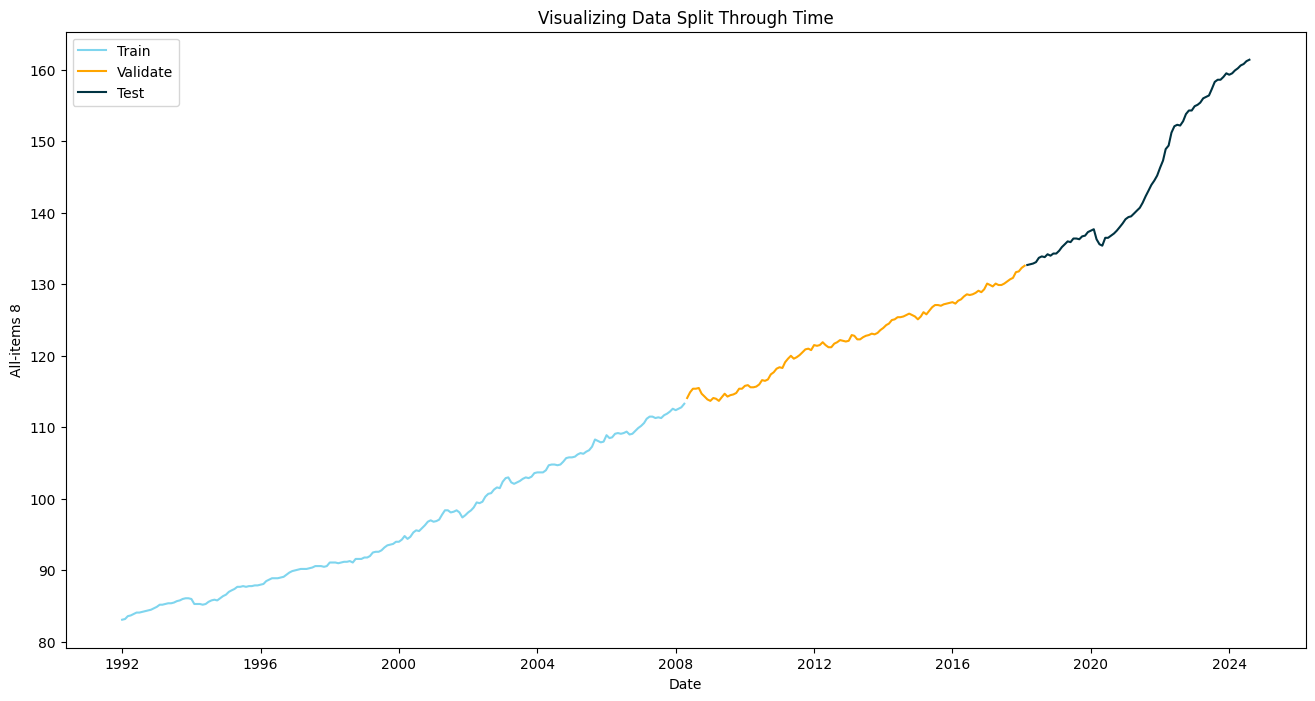

In [91]:
# Visualizing how data is split through time
plt.figure(figsize = (16,8))
sns.lineplot(x=train.index, y=train.allitems_8, color='#7FD5EE', label='Train')
sns.lineplot(x=validate.index, y=validate.allitems_8, color='#FFA500', label='Validate')
sns.lineplot(x=test.index, y=test.allitems_8, color='#003342', label='Test')
plt.title("Visualizing Data Split Through Time")
plt.xlabel("Date")
plt.ylabel("All-items 8")

# Show legend
plt.legend()

# Display plot
plt.show()

***

# Exploratory Data Analysis (EDA)

In [92]:
train.head()

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
Date                                                                                             
1992-01-01                                                                  79.8                 
1992-02-01                                                                  79.9                 
1992-03-01                                                                  80.2                 
1992-04-01                                                                  80.5                 
1992-05-01                                                                  80.9                 

Products and product groups 7  allitems_8  clothing_and_footwear  food  \
Date                                                                     
1992-01-01                           83.1                   94.1  82.0   
1992-02-01                           83.2                   94.8  82.2   
1992-03-01                           83.6                   94.8  82.9   
1992-04-01                           83.7                   94.7  83.0   
1992-05-01                           83.9                   95.5  82.8   

Products and product groups 7  health_and_personal_care  \
Date                                                      
1992-01-01                                         85.3   
1992-02-01                                         85.1   
1992-03-01                                         85.5   
1992-04-01                                         86.1   
1992-05-01                                         86.2   

Products and product groups 7  household_operations__furnishings_and_equipment  \
Date                                                                             
1992-01-01                                                                87.7   
1992-02-01                                                                87.7   
1992-03-01                                                                87.6   
1992-04-01                                                                87.6   
1992-05-01                                                                87.7   

Products and product groups 7  recreation__education_and_reading  shelter  \
Date                                                                        
1992-01-01                                                  78.9     87.6   
1992-02-01                                                  78.9     87.6   
1992-03-01                                                  79.0     87.5   
1992-04-01                                                  78.8     87.4   
1992-05-01                                                  78.9     87.6   

Products and product groups 7  transportation  \
Date                                            
1992-01-01                               73.6   
1992-02-01                               72.7   
1992-03-01                               73.6   
1992-04-01                               73.7   
1992-05-01                               74.0   

Products and product groups 7  alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change  \
Date                                                                                                            
1992-01-01                                                                   0.0                                
1992-02-01                                                                   0.1                                
1992-03-01                                                                   0.3                                
1992-04-01                                                                   0.3                                
1992-05-01                                                                   0.4                                

Products and product groups 7  allitems_8_monthly_change  \
Date                                                       
1992-01-0

### All Category Price Trend

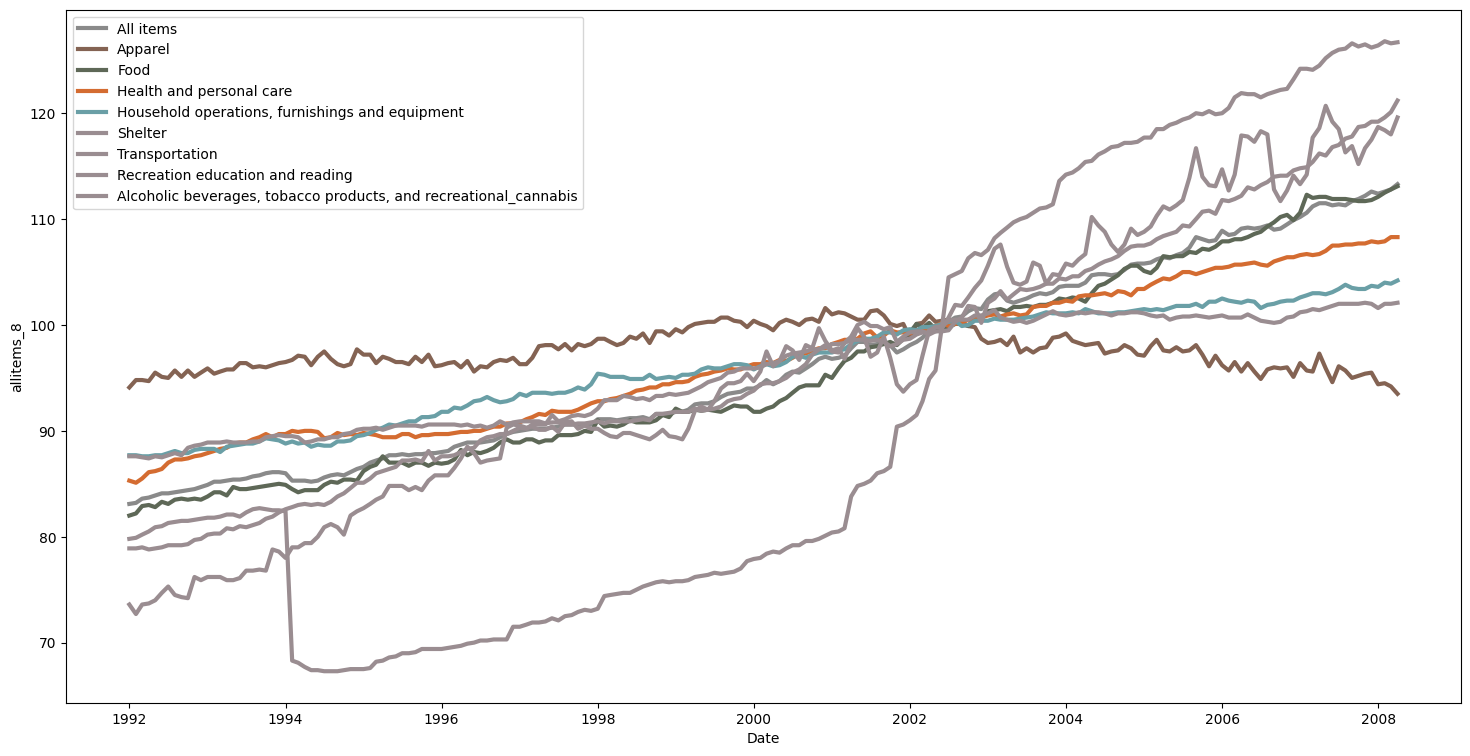

In [121]:
# Visualizing value over time
plt.figure(figsize = (18,9))
sns.lineplot(x=train.index, y=train.allitems_8, label = 'All items', linewidth = 3, color = '#8a8a8a')
sns.lineplot(x=train.index, y=train.clothing_and_footwear, label ='Apparel', linewidth = 3, color = '#846353')
sns.lineplot(x=train.index, y=train.food, label = 'Food', linewidth = 3, color = '#5e6857')
sns.lineplot(x=train.index, y=train.health_and_personal_care, label = 'Health and personal care', linewidth = 3, color = '#d46c31')
sns.lineplot(x=train.index, y=train.household_operations__furnishings_and_equipment, label = 'Household operations, furnishings and equipment', linewidth = 3, color = '#6a9fa6')
sns.lineplot(x=train.index, y=train.shelter, label = 'Shelter', linewidth = 3, color = '#9a8d91')
sns.lineplot(x=train.index, y=train.transportation, label = 'Transportation', linewidth = 3, color = '#9a8d91')
sns.lineplot(x=train.index, y=train.recreation__education_and_reading, label = 'Recreation education and reading', linewidth = 3, color = '#9a8d91')
sns.lineplot(x=train.index, y=train.alcoholic_beverages__tobacco_products_and_recreational_cannabis, label = 'Alcoholic beverages, tobacco products, and recreational_cannabis', linewidth = 3, color = '#9a8d91')

plt.legend()

### Aggregating by Month

**Al Items**

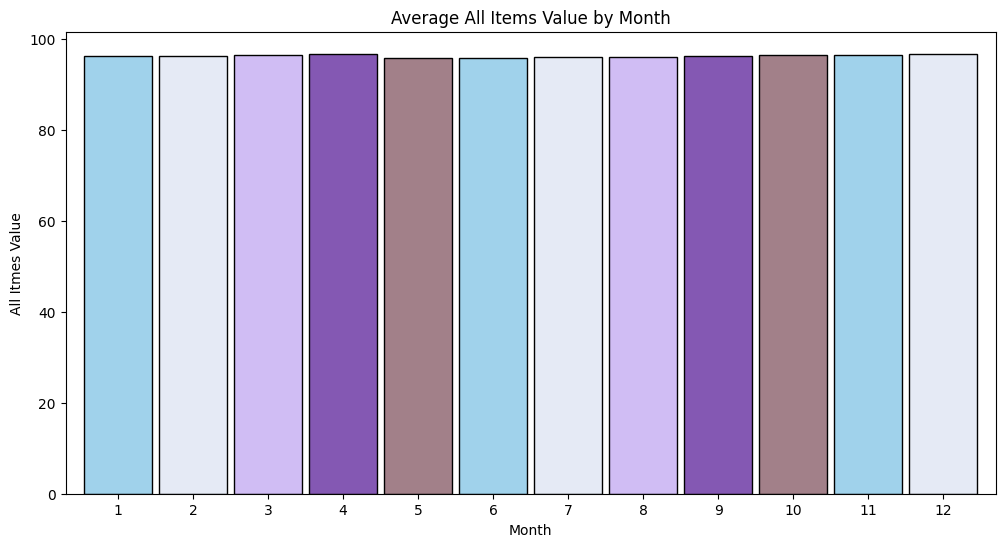

In [103]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).allitems_8.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average All Items Value by Month', xlabel='Month', ylabel='All Itmes Value')
plt.show()

**Clothing and footwear**

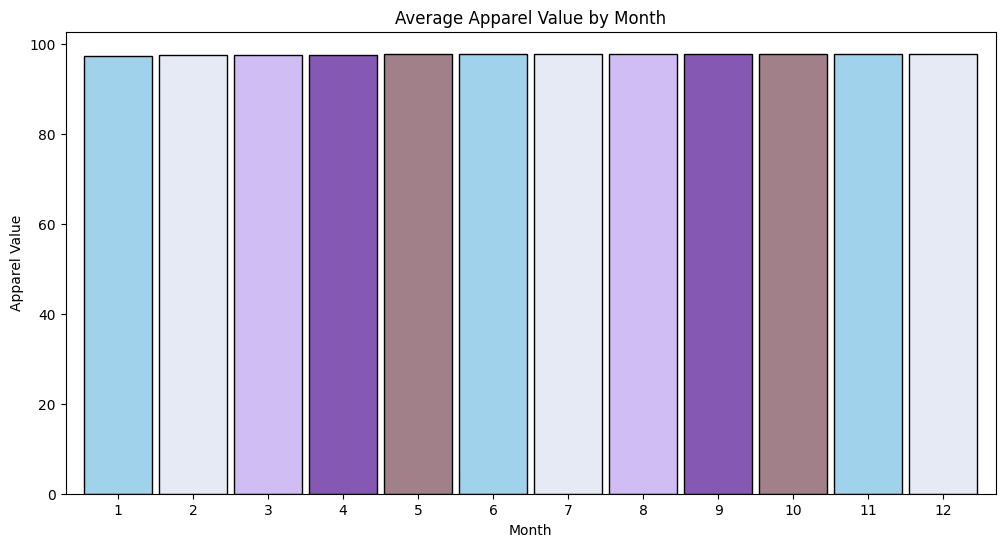

In [104]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).clothing_and_footwear.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Apparel Value by Month', xlabel='Month', ylabel='Apparel Value')
plt.show()

**Shelter**

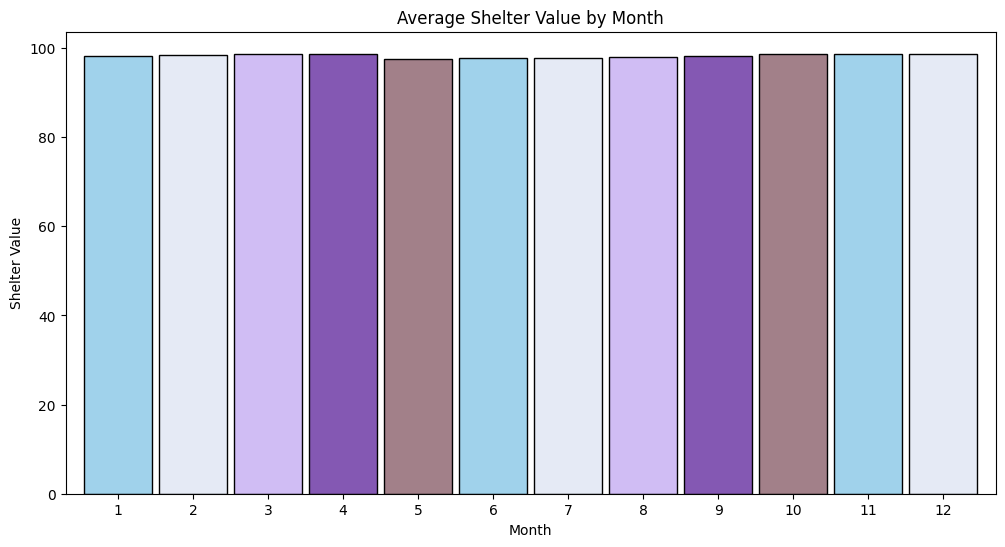

In [112]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).shelter.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Shelter Value by Month', xlabel='Month', ylabel='Shelter Value')
plt.show()

**Food**

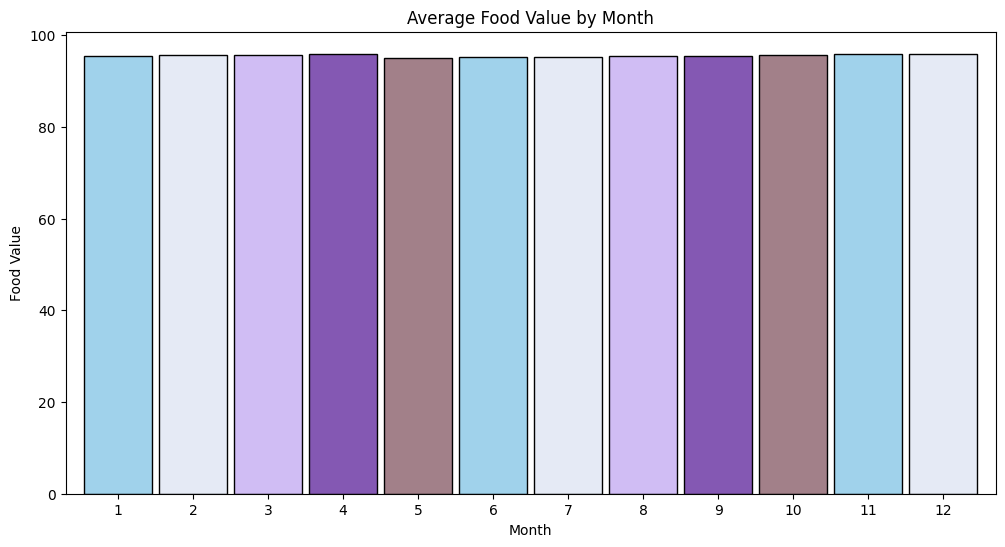

In [106]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).food.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Food Value by Month', xlabel='Month', ylabel='Food Value')
plt.show()

**Health and personal care**

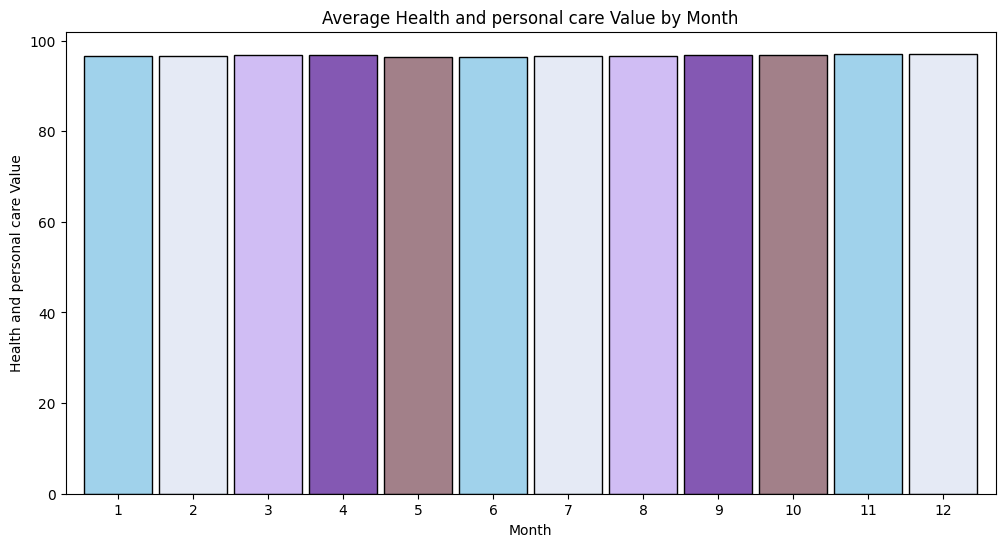

In [111]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).health_and_personal_care.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Health and personal care Value by Month', xlabel='Month', ylabel='Health and personal care Value')
plt.show()

**Household operations, furnishings and equipment**

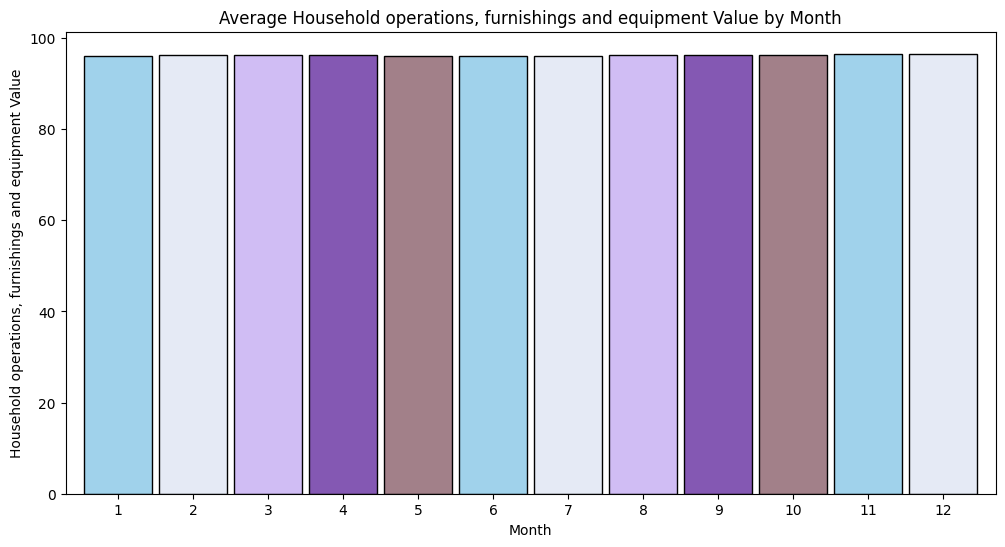

In [116]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).household_operations__furnishings_and_equipment.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Household operations, furnishings and equipment Value by Month', xlabel='Month', ylabel='Household operations, furnishings and equipment Value')
plt.show()

**Transportation**

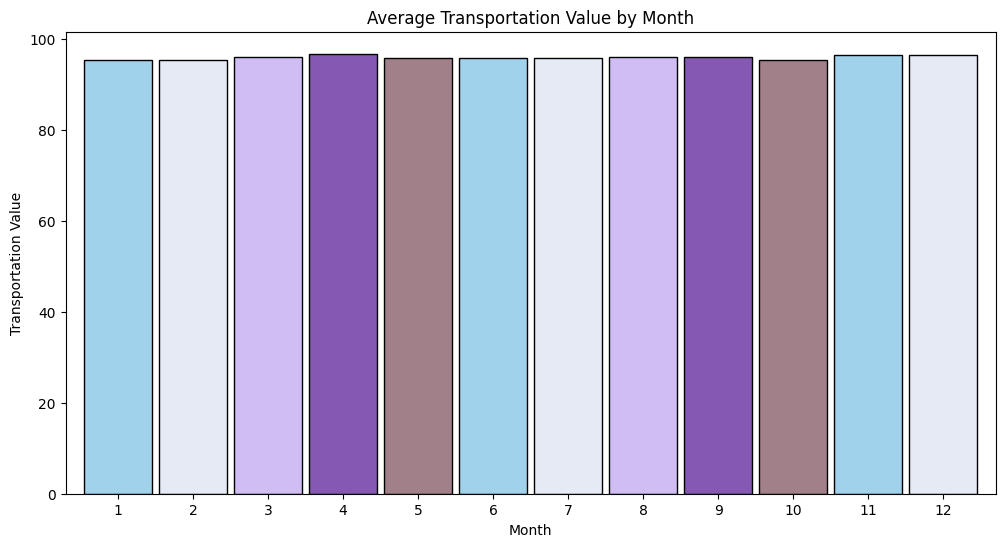

In [119]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).transportation.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Transportation Value by Month', xlabel='Month', ylabel='Transportation Value')
plt.show()

**Recreation education and reading**

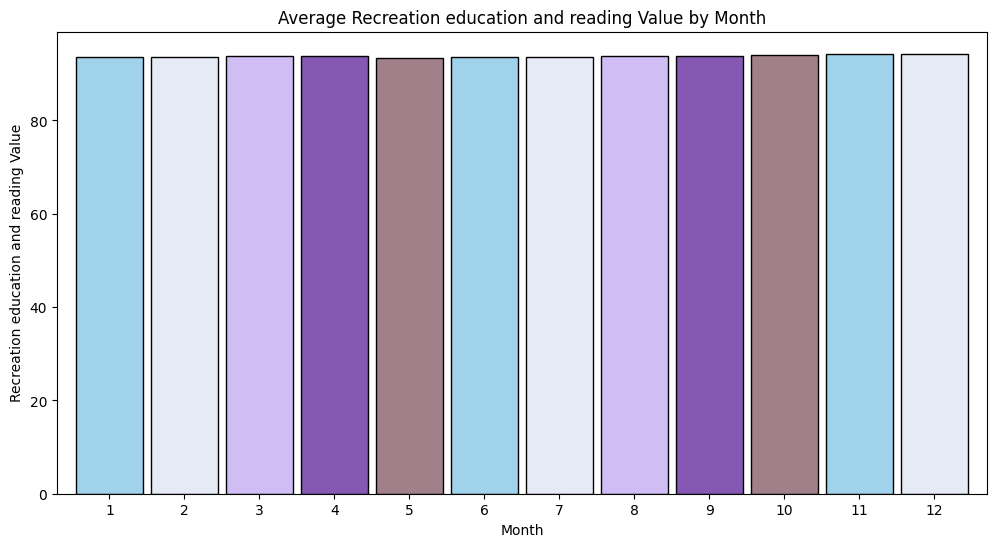

In [120]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).recreation__education_and_reading.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Recreation education and reading Value by Month', xlabel='Month', ylabel='Recreation education and reading Value')
plt.show()

**Alcoholic beverages, tobacco products, and recreational_cannabis**

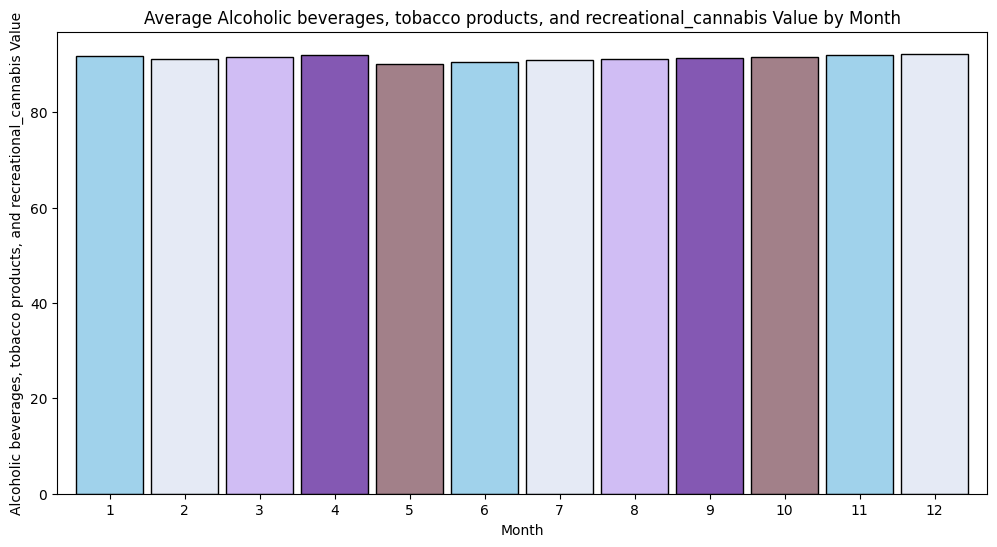

In [122]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).alcoholic_beverages__tobacco_products_and_recreational_cannabis.mean().plot.bar(width=.9, ec='black', color = ['#a0d2eb', '#e5eaf5', '#d0bdf4', '#8458B3', '#a28089'])
plt.xticks(rotation=0)
ax.set(title='Average Alcoholic beverages, tobacco products, and recreational_cannabis Value by Month', xlabel='Month', ylabel='Alcoholic beverages, tobacco products, and recreational_cannabis Value')
plt.show()

<h3><div class="alert alert-info">We don't see significant difference per month.

***

Before we try out different methods for forecasting sales and number of items sold, let's create a couple of functions that will be helpful in evaluating each of the methods that follow. 

`evaluate()` will compute the Mean Squared Error and the Root Mean Squared Error to evaluate.  

In [123]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

`plot_and_eval()` will use the evaluate function and also plot train and test values with the predicted values in order to compare performance. 

In [124]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=3, color = '#6a9fa6')
    plt.plot(validate[target_var], label='Validate', linewidth=3, color = '#5b766f')
    plt.plot(yhat_df[target_var], label = 'Prediction', linewidth = 3, color = '#d46c31')
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Write `append_eval_df(model_type)` to append evaluation metrics for each model type, target variable, and metric type, along with the metric value into our `eval_df` data frame object. Which we will create an empty `eval_df` dataframe object to start. 

In [182]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

Empty DataFrame
Columns: [model_type, target_var, rmse]
Index: []

In [183]:
def append_eval_df(model_type, target_var, eval_df):
    '''
    This function takes in as arguments the type of model run, 
    the name of the target variable, and the evaluation DataFrame.
    It returns the updated eval_df with the RMSE appended for that model and target_var.
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)

    # Use pd.concat() instead of append
    eval_df = pd.concat([eval_df, d], ignore_index=True)

    return eval_df

# Forecast 

Forecasting is another word for predicting time series data. 

1. Last Observed Value: The future will look like the now
2. Simple Average: The future will look, on average, like history. 
3. Moving Average: The future will look, on average, like recent history. 
4. Holt's Linear Trend
5. Previous Cycle


### Last observed value

The simplest method for forecasting is to predict all future values to be the last observed value.  

**Make Predictions**

`all_items_value`

In [184]:
train['allitems_8'][-1:][0]

np.float64(113.3)

In [185]:
# take the last item of all item value and assign to variable
last_value = train['allitems_8'][-1:][0]
last_value

np.float64(113.3)

In [186]:
yhat_df = pd.DataFrame(
    {'allitems_8': [last_value]},
    index=validate.index)

yhat_df.head()

allitems_8
Date                  
2008-05-01       113.3
2008-06-01       113.3
2008-07-01       113.3
2008-08-01       113.3
2008-09-01       113.3

**Note**: every predicted value in yhat_df is the same.

**Plot Actual vs. Predicted Values**

Now, let's plot actual and predicted values

allitems_8 -- RMSE: 11


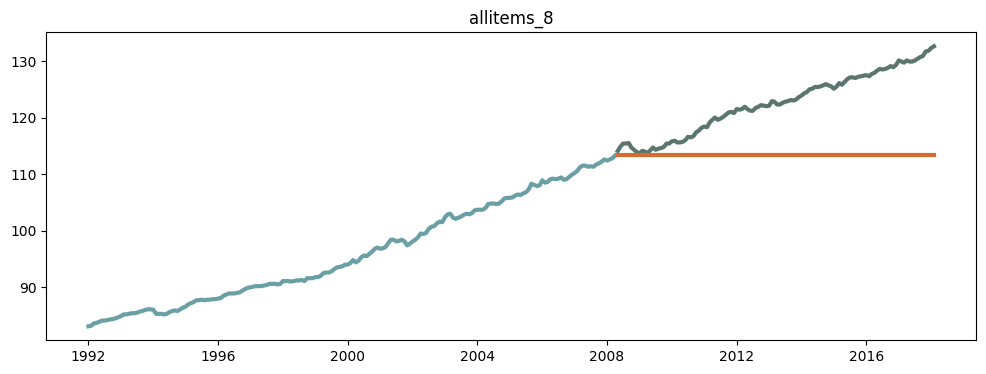

In [187]:
plot_and_eval('allitems_8')

**Evaluate** 

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [188]:
eval_df = append_eval_df(model_type='last_observed_value',target_var='allitems_8', eval_df=eval_df)

eval_df

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0

### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

Establishing the value of the prediction we will make.

In [189]:
# compute simple average
avg_value = round(train['allitems_8'].mean(), 2)
avg_value

np.float64(96.23)

Apply predictions to our observations.

In [190]:
def make_predictions(allitems_8=None):
    yhat_df = pd.DataFrame({'allitems_8': [allitems_8]},
                          index=validate.index)
    return yhat_df

In [191]:
yhat_df = make_predictions(avg_value)

In [192]:
yhat_df.describe()

allitems_8
count  1.180000e+02
mean   9.623000e+01
std    2.854291e-14
min    9.623000e+01
25%    9.623000e+01
50%    9.623000e+01
75%    9.623000e+01
max    9.623000e+01

**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Simple Average**

allitems_8 -- RMSE: 27


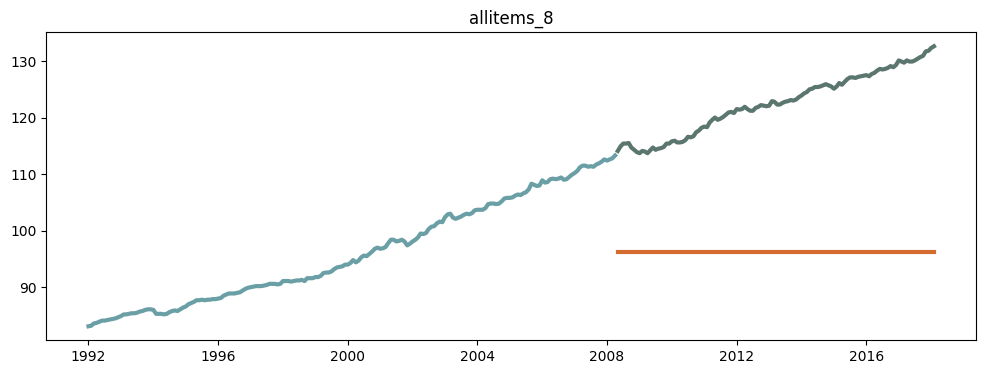

In [193]:
plot_and_eval('allitems_8')

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [194]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'allitems_8',eval_df=eval_df)
eval_df

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0
1       simple_average  allitems_8  27.0

### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value. 

In [195]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['allitems_8'].rolling(30).mean())

Date
1992-01-01           NaN
1992-02-01           NaN
1992-03-01           NaN
1992-04-01           NaN
1992-05-01           NaN
                 ...    
2007-12-01    109.776667
2008-01-01    109.963333
2008-02-01    110.140000
2008-03-01    110.290000
2008-04-01    110.463333
Name: allitems_8, Length: 196, dtype: float64


**Make Predictions**

In [196]:
period=30
train['allitems_8'].rolling(period).mean()[-1]

np.float64(110.46333333333334)

In [197]:
period = 30 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_value = round(train['allitems_8'].rolling(period).mean()[-1], 2)
print(rolling_value)

110.46


In [198]:
yhat_df = make_predictions(rolling_value)
yhat_df.head()

allitems_8
Date                  
2008-05-01      110.46
2008-06-01      110.46
2008-07-01      110.46
2008-08-01      110.46
2008-09-01      110.46

**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

allitems_8 -- RMSE: 13


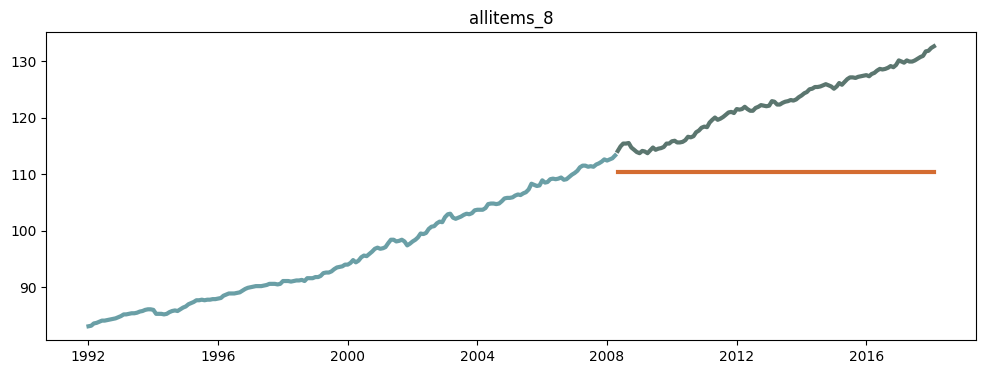

In [199]:
plot_and_eval('allitems_8')

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [200]:
eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = 'allitems_8', eval_df=eval_df)
eval_df

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0
1       simple_average  allitems_8  27.0
2       30d_moving_avg  allitems_8  13.0

Let's try out several other values for periods:

In [201]:
periods = [4, 12, 26, 52, 104]

for p in periods: 
    rolling_value = round(train['allitems_8'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(rolling_value)
    model_type = str(p) + '_day_moving_avg'
    eval_df = append_eval_df(model_type = model_type,
                                target_var = 'allitems_8',eval_df=eval_df)

In [202]:
eval_df

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0
1       simple_average  allitems_8  27.0
2       30d_moving_avg  allitems_8  13.0
3     4_day_moving_avg  allitems_8  11.0
4    12_day_moving_avg  allitems_8  12.0
5    26_day_moving_avg  allitems_8  13.0
6    52_day_moving_avg  allitems_8  15.0
7   104_day_moving_avg  allitems_8  20.0

4 day moving average and last_observed_value is the best so far.

In [203]:
min_items_rmse = eval_df[eval_df.target_var == 'allitems_8']['rmse'].min()

In [204]:
min_items_rmse

np.float64(11.0)

In [205]:
# Find the model with the lowest rmse
eval_df[eval_df.rmse == min_items_rmse]

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0
3     4_day_moving_avg  allitems_8  11.0

### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [206]:
import statsmodels.api as sm

In [207]:
col = 'allitems_8' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [208]:
# fit the holt's object
model = model.fit(optimized=True)

In [209]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [210]:
validate.shape

(118, 20)

In [211]:
yhat_items

2008-05-01    113.465800
2008-06-01    113.630770
2008-07-01    113.794916
2008-08-01    113.958241
2008-09-01    114.120750
                 ...    
2017-10-01    127.733943
2017-11-01    127.827573
2017-12-01    127.920735
2018-01-01    128.013431
2018-02-01    128.105663
Freq: MS, Length: 118, dtype: float64

In [212]:
model = Holt(train[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
yhat_df[col] = round(yhat_items, 2)

In [213]:
yhat_df

allitems_8
Date                  
2008-05-01      113.47
2008-06-01      113.63
2008-07-01      113.79
2008-08-01      113.96
2008-09-01      114.12
...                ...
2017-10-01      127.73
2017-11-01      127.83
2017-12-01      127.92
2018-01-01      128.01
2018-02-01      128.11

[118 rows x 1 columns]

**Plot Actual vs. Predicted Values**

allitems_8 -- RMSE: 2


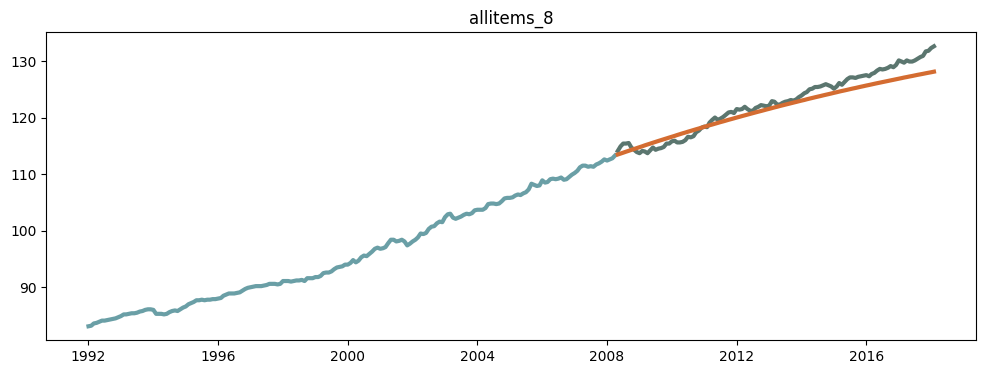

In [214]:
plot_and_eval(target_var = col)

**Evaluate**

In [215]:
eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col, eval_df=eval_df)

In [216]:
eval_df.sort_values(by='rmse')

model_type  target_var  rmse
8      holts_optimized  allitems_8   2.0
0  last_observed_value  allitems_8  11.0
3     4_day_moving_avg  allitems_8  11.0
4    12_day_moving_avg  allitems_8  12.0
2       30d_moving_avg  allitems_8  13.0
5    26_day_moving_avg  allitems_8  13.0
6    52_day_moving_avg  allitems_8  15.0
7   104_day_moving_avg  allitems_8  20.0
1       simple_average  allitems_8  27.0

**Holt's optimized model has the lowest RMSE of 2.0**

# Conclusion

Which model did the best? 

In [217]:
eval_df

model_type  target_var  rmse
0  last_observed_value  allitems_8  11.0
1       simple_average  allitems_8  27.0
2       30d_moving_avg  allitems_8  13.0
3     4_day_moving_avg  allitems_8  11.0
4    12_day_moving_avg  allitems_8  12.0
5    26_day_moving_avg  allitems_8  13.0
6    52_day_moving_avg  allitems_8  15.0
7   104_day_moving_avg  allitems_8  20.0
8      holts_optimized  allitems_8   2.0

In [218]:
min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]
# find which model that is
eval_df[(eval_df.rmse == min_rmse)]

model_type  target_var  rmse
8  holts_optimized  allitems_8   2.0

Let's test it out on our out-of-sample data

We will be using train + validate to predict test. 

In [262]:
train_val = pd.concat([train, validate])
col = 'allitems_8' 
model = Holt(train_val[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = test.index[0],
                              end = test.index[-1])
final_yhat = pd.DataFrame(round(yhat_items, 2), columns = ['allitems_8'])

In [263]:
final_yhat

allitems_8
2018-03-01      132.76
2018-04-01      132.92
2018-05-01      133.07
2018-06-01      133.23
2018-07-01      133.38
...                ...
2024-04-01      142.43
2024-05-01      142.54
2024-06-01      142.64
2024-07-01      142.75
2024-08-01      142.86

[78 rows x 1 columns]

allitems_8 -- RMSE: 10


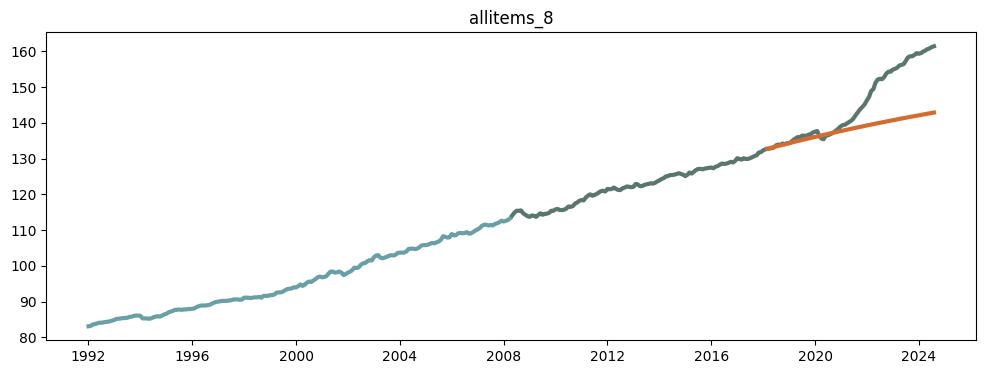

In [264]:
plot_and_eval_test(target_var = col)

Clearly the model performs well on train and validate data with rmse of 2 but with the test data the rmse is 10, most likely due to the sudden spike when COVID-19 happened and the aftermath that followed

In [225]:
df_pivoted.to_csv('cpi_canada_cleaned.csv',index=True)


In [3]:
df_read=pd.read_csv('cpi_canada_cleaned.csv')
df_read

Date  \
0    1992-01-01   
1    1992-02-01   
2    1992-03-01   
3    1992-04-01   
4    1992-05-01   
..          ...   
387  2024-04-01   
388  2024-05-01   
389  2024-06-01   
390  2024-07-01   
391  2024-08-01   

     alcoholic_beverages__tobacco_products_and_recreational_cannabis  \
0                                                 79.8                 
1                                                 79.9                 
2                                                 80.2                 
3                                                 80.5                 
4                                                 80.9                 
..                                                 ...                 
387                                              195.5                 
388                                              195.8                 
389                                              196.2                 
390                                              196.3                 
391                                              197.5                 

     allitems_8  clothing_and_footwear   food  health_and_personal_care  \
0          83.1                   94.1   82.0                      85.3   
1          83.2                   94.8   82.2                      85.1   
2          83.6                   94.8   82.9                      85.5   
3          83.7                   94.7   83.0                      86.1   
4          83.9                   95.5   82.8                      86.2   
..          ...                    ...    ...                       ...   
387       160.2                   94.2  187.3                     149.4   
388       160.6                   93.7  188.4                     150.5   
389       160.8                   93.6  189.6                     150.3   
390       161.2                   93.6  190.1                     150.4   
391       161.4                   92.9  190.5                     150.8   

     household_operations__furnishings_and_equipment  \
0                                               87.7   
1                                               87.7   
2                                               87.6   
3                                               87.6   
4                                               87.7   
..                                               ...   
387                                            130.4   
388                                            130.5   
389                                            130.8   
390                                            131.5   
391                                            130.9   

     recreation__education_and_reading  shelter  transportation  ...  \
0                                 78.9     87.6            73.6  ...   
1                                 78.9     87.6            72.7  ...   
2                                 79.0     87.5            73.6  ...   
3                                 78.8     87.4            73.7  ...   
4                                 78.9     87.6            74.0  ...   
..                                 ...      ...             ...  ...   
387                              127.2    180.8           172.8  ...   
388                              127.7    181.5           172.1  ...   
389                              126.8    182.1           171.7  ...   
390                              126.5    182.5           171.9  ...   
391                              126.7    183.3           171.2  ...   

     allitems_8_monthly_change  clothing_and_footwear_monthly_change  \
0                          0.0                                   0.0   
1                          0.1                                   0.7   
2                          0.4                                   0.0   
3                          0.1                                  -0.1   
4                          0.2                                   0.8   
..                         ...                

### Let's try LSTM

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

In [5]:
y = df_read['allitems_8']


In [6]:
# reshaping close column or variable y from main data set 
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

In [7]:
# generate the input and output sequences
n_lookback = 12  # length of input sequences (lookback period)
n_forecast = 8  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

In [8]:
# fit the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=100))
model.add(Dense(n_forecast))

In [9]:
# declare epoch and batch size to train 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=8, verbose=0)

In [10]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


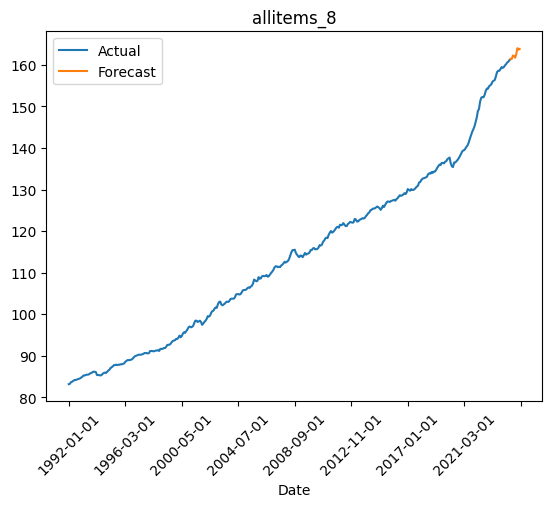

In [12]:
# organize the results in a data frame
df_past = df_read[['Date','allitems_8']]
df_past.rename(columns={'index': 'Date', 'allitems_8': 'Actual'}, inplace=True)
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] ,freq='MS', periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = pd.concat([df_past, df_future]).set_index('Date')

# Plot the results
ax = results.plot(title='allitems_8')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

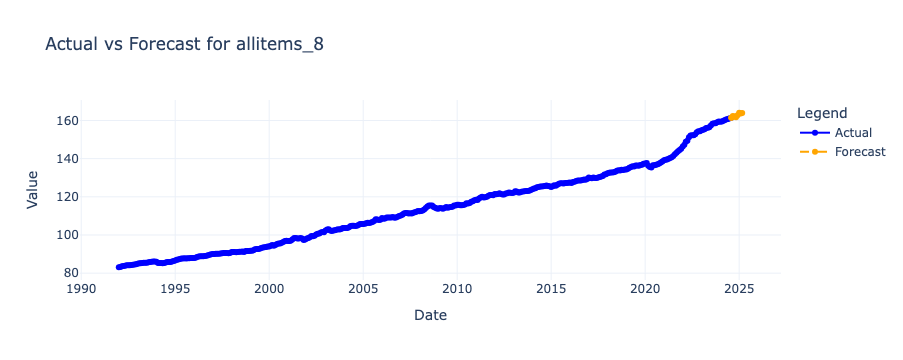

In [13]:
# In plotly
import plotly.graph_objects as go

# Create Plotly figure
fig = go.Figure()

# Add actual values to the plot
fig.add_trace(go.Scatter(x=results.index, y=results['Actual'], mode='lines+markers', name='Actual', line=dict(color='blue')))

# Add forecast values to the plot
fig.add_trace(go.Scatter(x=results.index, y=results['Forecast'], mode='lines+markers', name='Forecast', line=dict(color='orange', dash='dash')))

# Update layout
fig.update_layout(title='Actual vs Forecast for allitems_8',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  legend_title='Legend',
                  template='plotly_white')

# Show the plot
fig.show()

Looks better

Let us plot for all the columns 

In [23]:
df_read.columns

Index(['Date',
       'alcoholic_beverages__tobacco_products_and_recreational_cannabis',
       'allitems_8', 'clothing_and_footwear', 'food',
       'health_and_personal_care',
       'household_operations__furnishings_and_equipment',
       'recreation__education_and_reading', 'shelter', 'transportation',
       'alcoholic_beverages__tobacco_products_and_recreational_cannabis_monthly_change',
       'allitems_8_monthly_change', 'clothing_and_footwear_monthly_change',
       'food_monthly_change', 'health_and_personal_care_monthly_change',
       'household_operations__furnishings_and_equipment_monthly_change',
       'recreation__education_and_reading_monthly_change',
       'shelter_monthly_change', 'transportation_monthly_change', 'month',
       'year'],
      dtype='object')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


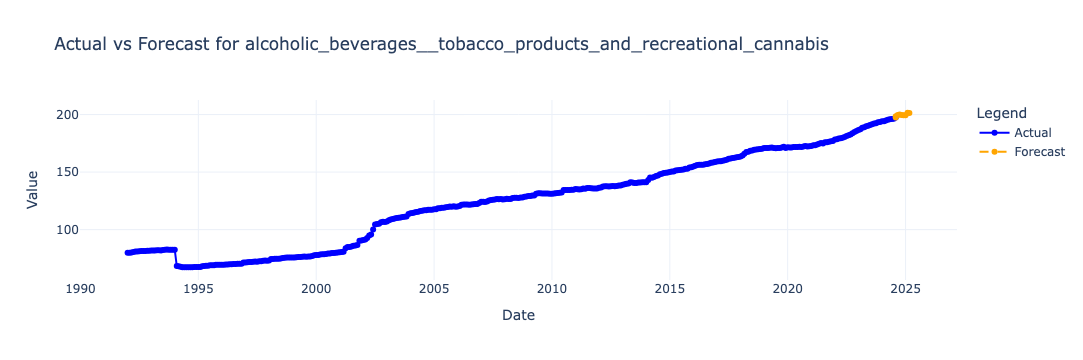

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


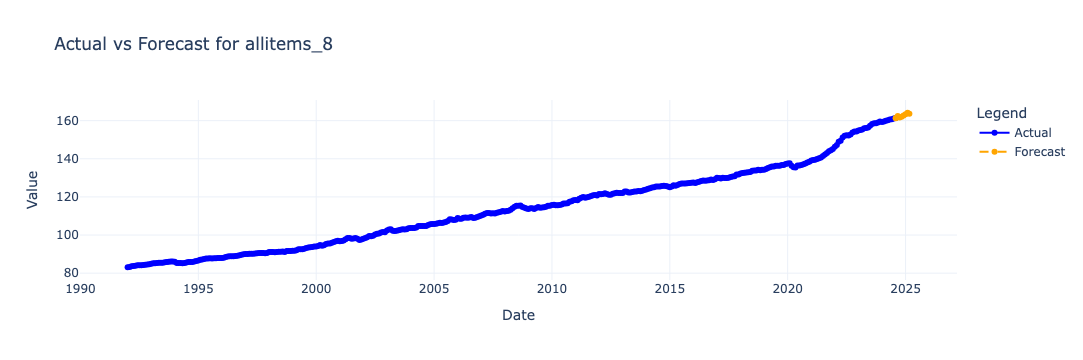

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


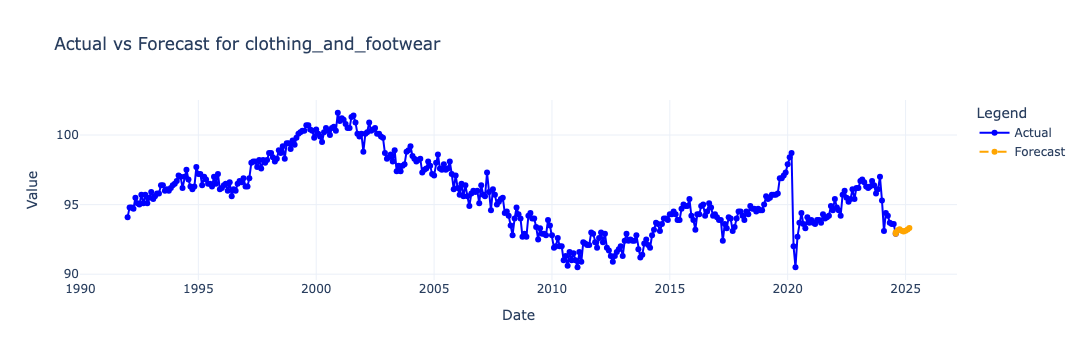

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


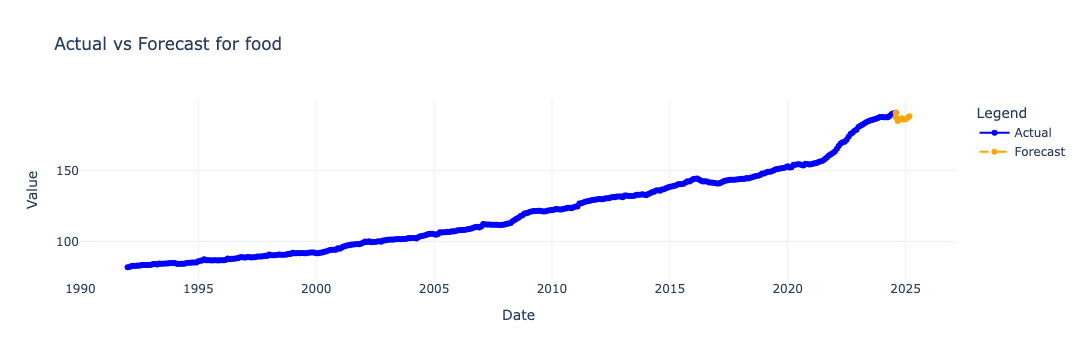

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


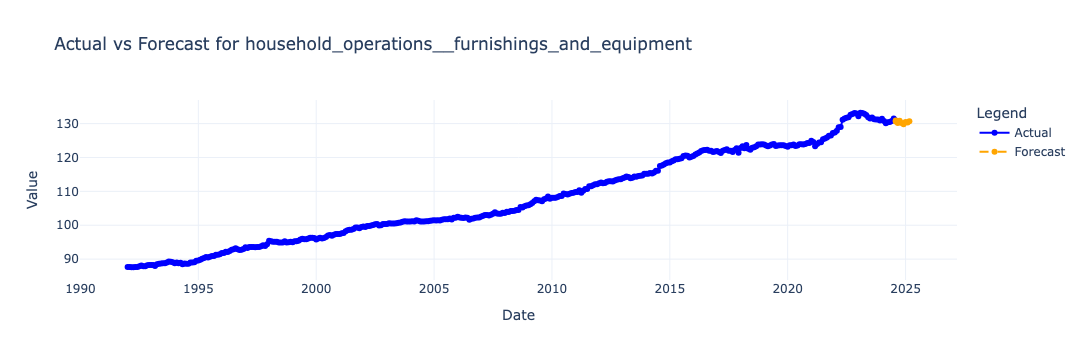

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


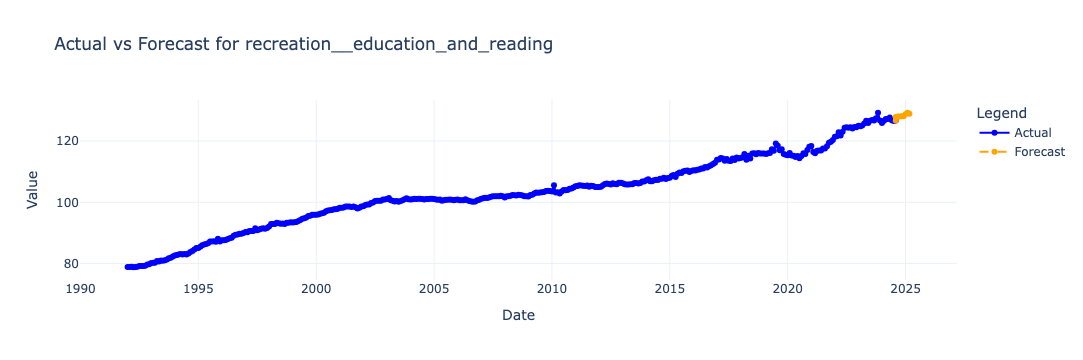

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


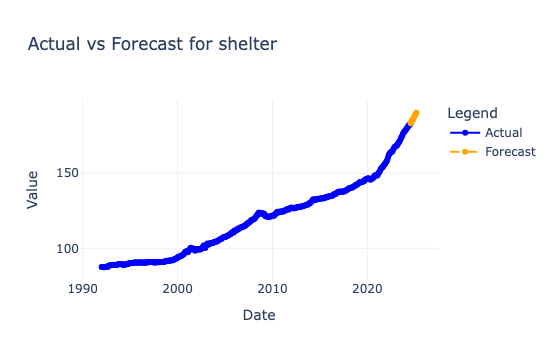

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [15]:
n_lookback = 12  # length of input sequences (lookback period)
n_forecast = 8  # length of output sequences (forecast period)


columns_to_process = [
    'alcoholic_beverages__tobacco_products_and_recreational_cannabis',
    'allitems_8',
    'clothing_and_footwear',
    'food',
    'health_and_personal_care',
    'household_operations__furnishings_and_equipment',
    'recreation__education_and_reading',
    'shelter',
    'transportation',
]

for col in columns_to_process:
    y = df_read[col]
    y = y.values.reshape(-1, 1)

    # scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(y)
    y = scaler.transform(y)
    # generate the input and output sequences
    X = []
    Y = []
    
    for i in range(n_lookback, len(y) - n_forecast + 1):
        X.append(y[i - n_lookback: i])
        Y.append(y[i: i + n_forecast])
    
    X = np.array(X)
    Y = np.array(Y)

        # fit the model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(n_lookback, 1)))
    model.add(LSTM(units=100))
    model.add(Dense(n_forecast))
        
        # declare epoch and batch size to train 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=100, batch_size=8, verbose=0)

        # generate the forecasts
    X_ = y[- n_lookback:]  # last available input sequence
    X_ = X_.reshape(1, n_lookback, 1)
    
    Y_ = model.predict(X_).reshape(-1, 1)
    Y_ = scaler.inverse_transform(Y_)

        # organize the results in a data frame
    df_past = df_read[['Date',col]]
    df_past.rename(columns={'index': 'Date', col: 'Actual'}, inplace=True)
    df_past['Forecast'] = np.nan
    df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]
    
    df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
    df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] ,freq='MS', periods=n_forecast)
    df_future['Forecast'] = Y_.flatten()
    df_future['Actual'] = np.nan
    
    results = pd.concat([df_past, df_future]).set_index('Date')

        # Create Plotly figure
    fig = go.Figure()
    
    # Add actual values to the plot
    fig.add_trace(go.Scatter(x=results.index, y=results['Actual'], mode='lines+markers', name='Actual', line=dict(color='blue')))
    
    # Add forecast values to the plot
    fig.add_trace(go.Scatter(x=results.index, y=results['Forecast'], mode='lines+markers', name='Forecast', line=dict(color='orange', dash='dash')))
    
    # Update layout
    fig.update_layout(title=f'Actual vs Forecast for {col}',
                      xaxis_title='Date',
                      yaxis_title='Value',
                      legend_title='Legend',
                      template='plotly_white')
    
    # Show the plot
    fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


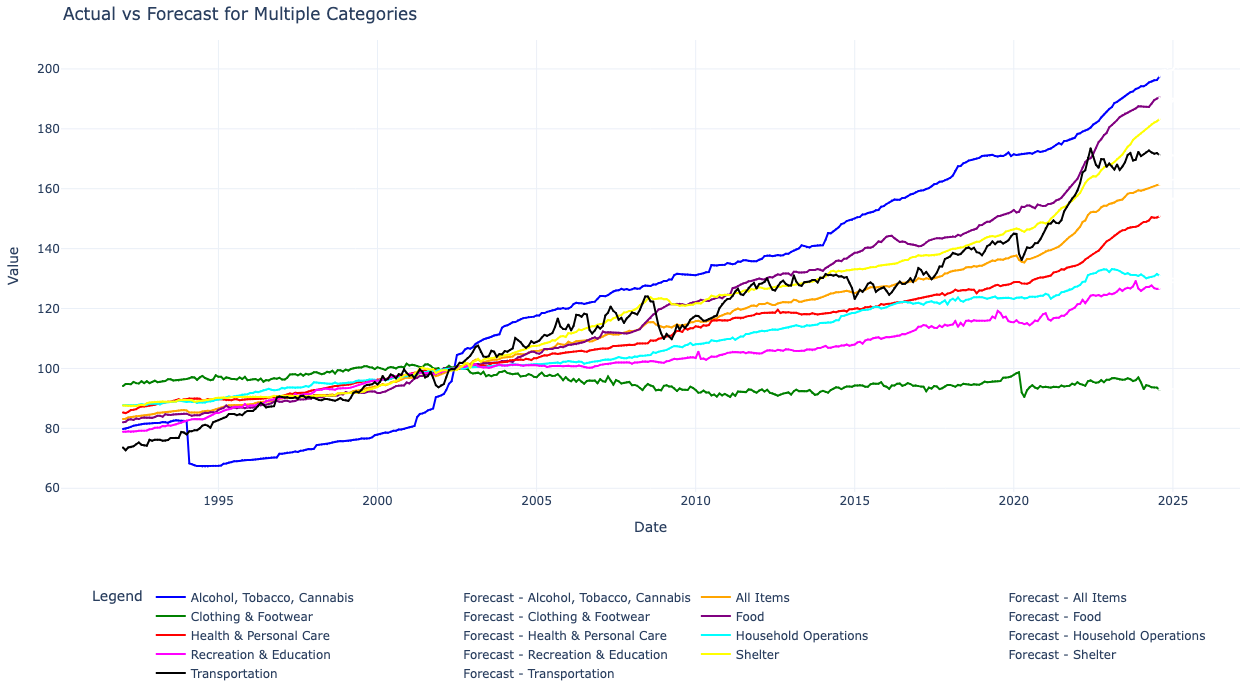


Projected Percentage Change Over the Next 8 Months:
Alcohol, Tobacco, Cannabis: 0.74%
All Items: 1.46%
Clothing & Footwear: 0.35%
Food: 1.92%
Health & Personal Care: 2.3%
Household Operations: 0.36%
Recreation & Education: 1.4%
Shelter: 3.58%
Transportation: 2.67%


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go

# Assuming df_read is your DataFrame and has been defined before this code
n_lookback = 12  # length of input sequences (lookback period)
n_forecast = 8  # length of output sequences (forecast period for 4 months)

columns_to_process = [
    'alcoholic_beverages__tobacco_products_and_recreational_cannabis',
    'allitems_8',
    'clothing_and_footwear',
    'food',
    'health_and_personal_care',
    'household_operations__furnishings_and_equipment',
    'recreation__education_and_reading',
    'shelter',
    'transportation',
]

# Create a single Plotly figure
fig = go.Figure()

# Define colors for each column (using white for forecast)
colors = {
    'alcoholic_beverages__tobacco_products_and_recreational_cannabis': 'blue',
    'allitems_8': 'orange',
    'clothing_and_footwear': 'green',
    'food': 'purple',
    'health_and_personal_care': 'red',
    'household_operations__furnishings_and_equipment': 'cyan',
    'recreation__education_and_reading': 'magenta',
    'shelter': 'yellow',
    'transportation': 'black',
}

# Rename mapping for legend titles
rename_mapping = {
    'alcoholic_beverages__tobacco_products_and_recreational_cannabis': 'Alcohol, Tobacco, Cannabis',
    'allitems_8': 'All Items',
    'clothing_and_footwear': 'Clothing & Footwear',
    'food': 'Food',
    'health_and_personal_care': 'Health & Personal Care',
    'household_operations__furnishings_and_equipment': 'Household Operations',
    'recreation__education_and_reading': 'Recreation & Education',
    'shelter': 'Shelter',
    'transportation': 'Transportation'
}

# Store the percentage changes for each item
percentage_changes = {}

for col in columns_to_process:
    y = df_read[col].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(y)
    y = scaler.transform(y)

    # Generate the input and output sequences
    X = []
    Y = []

    for i in range(n_lookback, len(y) - n_forecast + 1):
        X.append(y[i - n_lookback: i])
        Y.append(y[i: i + n_forecast])

    X = np.array(X)
    Y = np.array(Y)

    # Fit the model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(n_lookback, 1)))
    model.add(LSTM(units=100))
    model.add(Dense(n_forecast))

    # Compile and fit the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=100, batch_size=8, verbose=0)

    # Generate the forecasts
    X_ = y[-n_lookback:]  # Last available input sequence
    X_ = X_.reshape(1, n_lookback, 1)
    
    Y_ = model.predict(X_).reshape(-1, 1)
    Y_ = scaler.inverse_transform(Y_)

    # Organize the results in a data frame
    df_past = df_read[['Date', col]].copy()
    df_past.rename(columns={col: 'Actual'}, inplace=True)
    df_past['Forecast'] = np.nan
    df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

    df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
    df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1], freq='MS', periods=n_forecast)
    df_future['Forecast'] = Y_.flatten()
    df_future['Actual'] = np.nan

    results = pd.concat([df_past, df_future]).set_index('Date')

    # Calculate percentage change over the 8-month forecast period
    first_forecast = Y_[0][0]
    last_forecast = Y_[-1][0]
    percent_change = ((last_forecast - first_forecast) / first_forecast) * 100
    percentage_changes[rename_mapping[col]] = percent_change

    # Add actual values to the plot
    fig.add_trace(go.Scatter(
        x=results.index, 
        y=results['Actual'], 
        mode='lines+markers',
        name=rename_mapping[col],  # Use renamed title for the legend
        line=dict(color=colors[col], width=2),  # Thinner line
        marker=dict(size=2)
        
    ))

    # Add forecast values to the plot
    fig.add_trace(go.Scatter(
        x=results.index, 
        y=results['Forecast'], 
        mode='lines+markers', 
        name=f'Forecast - {rename_mapping[col]}',  # Use renamed title for the legend
        line=dict(color='white', dash='dash', width=2),  # Thinner white line for forecast
        marker=dict(size=2)

    ))

# Update layout for the combined figure
fig.update_layout(
    title='Actual vs Forecast for Multiple Categories',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_white',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the paper
    legend=dict(
        x=0.5,  # Center the legend horizontally
        y=-0.2,  # Move the legend below the plot
        orientation='h',  # Horizontal orientation
        xanchor='center'  # Center anchor
    ),
    margin=dict(l=20, r=20, t=40, b=150),  # Adjust margins
    height=700,
    width=800
)

# Display the combined plotly figure
fig.show()

# Print the projected percentage changes below the graph
print("\nProjected Percentage Change Over the Next 8 Months:")
for item, change in percentage_changes.items():
    print(f"{item}: {round(change, 2)}%")


In [46]:
# Save the combined plotly figure as HTML
fig.write_html('combined_plot.html')

## Inference and Conclusion from Projected Percentage Change Over the Next 8 Months:
### Inference:
#### Shelter (3.58% Increase):

The most significant projected increase is seen in the shelter category, suggesting continued upward pressure on housing costs. This could be driven by factors such as increasing demand for housing, limited supply, or rising mortgage rates. It's critical to monitor the housing market as it will significantly impact household budgets.

#### Transportation (2.67% Increase):

Transportation is also expected to experience a substantial increase. Rising fuel costs or fluctuations in the automotive market (e.g., vehicle prices, maintenance costs) might contribute to this change. Given the impact of transportation on everyday life, this could lead to higher overall living costs.

#### Health & Personal Care (2.3% Increase):

This category's projected growth suggests increasing healthcare costs or higher prices for personal care items. Inflation in this area could be due to rising medical service fees or more expensive personal care products.

#### Food (1.92% Increase):

The food category shows a significant rise, indicating potential inflationary pressure in the cost of groceries. This could stem from supply chain disruptions, increased production costs, or shifts in global food markets. Rising food prices may contribute to overall inflation.
Recreation & Education (1.4% Increase):

The rise in recreation and education costs points to increased prices in leisure activities and educational services. This might reflect higher costs for entertainment, cultural events, or educational materials.

#### All Items (1.46% Increase):

The overall CPI forecast shows a modest increase of 1.46%, suggesting a general inflationary trend over the next 8 months. This indicates a consistent rise in the cost of living across multiple sectors.

#### Alcohol, Tobacco, and Cannabis (0.74% Increase):

The relatively smaller increase in alcohol, tobacco, and cannabis suggests moderate price stability in these areas. Government regulations, taxation, and controlled markets may help keep price volatility in check.

#### Clothing & Footwear (0.35% Increase) and Household Operations (0.36% Increase):

These categories exhibit the lowest projected inflation rates, indicating relatively stable prices for apparel and household services. This may reflect less immediate pressure from supply chain issues or consumer demand in these sectors.


# Conclusion:

- Overall Inflationary Trend: The forecasted CPI projections indicate a moderate inflationary trend across most categories, with the highest impacts expected in shelter, transportation, health care, and food. Rising prices in these essential categories could lead to increased financial pressure on households.

- Shelter and Transportation: With shelter and transportation showing significant price increases, it will be essential for policymakers and consumers to monitor these sectors closely. High housing and transportation costs can have ripple effects on the broader economy, especially impacting affordability for low- and middle-income families.

- Focus on Key Sectors: To mitigate the inflationary impact, it may be necessary to address the underlying causes of price increases, such as supply chain bottlenecks in food and fuel or market imbalances in housing.

- Potential Economic Adjustments: The projected inflationary pressures could trigger policy responses such as interest rate adjustments, subsidies for affected sectors, or targeted consumer protection measures to alleviate the cost burden on households.

In summary, the projections suggest inflationary trends will persist, with certain categories like shelter and transportation requiring close attention. Strategic economic planning may help to reduce inflationary pressures and stabilize costs for consumers over the coming months.





